# Visualización de Series Temporales

In [1]:
import pandas as pd
pd.set_option('max_columns', None)
import numpy as np

En este documento, veremos alguna particularidad de la representación de datos a lo largo del tiempo.
No se emplean librerías nuevas, sino que veremos las representaciones de estos datos empleando las herramientas ya vistas anteriormente.

## Tipos de series temporales

La particularidad que tienen los datos de series temporales es que contiene al menos una variable temporal: fecha, hora o fecha y hora. Es decir, son datos asociados unívocamente a un instante de tiempo.

El tiempo tiene como características que es linear y de grano totalmente variable (de años a milisegundos), por lo que se trata de un caso especial de variables de intervalo.

Los datos temporales pueden aparecer de dos formas diferentes:

1. Caso "Fuerte", en el que las fechas aparecen de forma explícita como el índice del conjunto de datos. 
Por ejemplo en los valores bursátiles:

In [2]:
stocks = pd.read_csv("./data/prices.csv", parse_dates=['date']) # Se leen los datos de valores bursatiles 
stocks = stocks[stocks['symbol'] == "GOOG"].set_index('date') # Se seleccionan solo los valores de la compañia Google y se marca como índice la fecha de cada valor
stocks.head()

,symbol,open,close,low,high,volume
date,,,,,,
2010-01-04,GOOG,626.951088,626.751061,624.241073,629.511067,3927000.0
2010-01-05,GOOG,627.181073,623.991055,621.541045,627.841071,6031900.0
2010-01-06,GOOG,625.861078,608.261023,606.361042,625.861078,7987100.0
2010-01-07,GOOG,609.401025,594.101005,592.651008,610.001045,12876600.0
2010-01-08,GOOG,592.000997,602.021036,589.110988,603.251034,9483900.0


In [3]:
stocks.describe()

,open,close,low,high,volume
count,1762.000000,1762.000000,1762.000000,1762.000000,1.762000e+03
mean,667.988556,667.732200,662.013391,673.341401,4.051179e+06
std,159.812252,159.790218,159.052972,160.469786,2.933261e+06
min,438.310758,436.070761,433.630737,442.280760,7.900000e+03
25%,548.639605,547.364993,542.753834,553.582514,1.901175e+06
50%,613.846067,614.161057,609.356057,619.111038,3.642400e+06
75%,749.962820,749.452515,742.882817,756.218456,5.165425e+06
max,1226.802152,1220.172036,1218.602083,1228.882066,2.976060e+07


Los datos se van recogiendo con una frecuencia o periodicidad normalmente fíja (de 1 día en este caso).  
Cada una de las muestras contiene datos relativos a ese instante de tiempo.

2. En el caso "Débil", los datos temporales aparecen como un dato más que indica un valor que se asocia a la muestra, pero la muestra no se define unívocamente por el dato.

Por ejemplo, en el conjunto de datos de acogida de animales, aparece la fecha de nacimiento "date_of_birth" y la fecha de registro "datetime", pero sirven para añadir información (2 animales pueden haber nacido en la misma fecha). 

In [4]:
shelter_outcomes = pd.read_csv(
    "./data/aac_shelter_outcomes.csv", 
    parse_dates=['date_of_birth', 'datetime']
)
shelter_outcomes = shelter_outcomes[
    ['outcome_type', 'age_upon_outcome', 'datetime', 'animal_type', 'breed', 
     'color', 'sex_upon_outcome', 'date_of_birth']
]
shelter_outcomes.head()

,outcome_type,age_upon_outcome,datetime,animal_type,breed,color,sex_upon_outcome,date_of_birth
0,Transfer,2 weeks,2014-07-22 16:04:00,Cat,Domestic Shorthair Mix,Orange Tabby,Intact Male,2014-07-07
1,Transfer,1 year,2013-11-07 11:47:00,Dog,Beagle Mix,White/Brown,Spayed Female,2012-11-06
2,Adoption,1 year,2014-06-03 14:20:00,Dog,Pit Bull,Blue/White,Neutered Male,2013-03-31
3,Transfer,9 years,2014-06-15 15:50:00,Dog,Miniature Schnauzer Mix,White,Neutered Male,2005-06-02
4,Euthanasia,5 months,2014-07-07 14:04:00,Other,Bat Mix,Brown,Unknown,2014-01-07


En resumen: en el 1º caso, el tiempo define de alguna forma los datos, el cambiar por ejemplo el periodo de tiempo deberá cambiar todos los datos recogidos; mientras que en el 2º simplemente se trata de información adicional, y no es probable que se puedan realizar transformaciones sobre estos tiempos.

## Visualizar por agrupamiento

Al tratarse el tiempo de variables de intervalo (cualitativas y ordenadas), podemos solicitar realizar agrupamientos.

Por ejemplo, un gráfico indicando en que fechas nacieron más animales de acogida sería:

In [5]:
shelter_outcomes['date_of_birth'].value_counts().sort_values().plot.line()

El gráfico puede resultar poco claro. El problema puede ser que la cuenta de la frecuencia de las variables aparece recogida por días del año.  
Para resumir esto y obtener una gráfica más clara, se pueden agrupar en periodos de tiempo. Es lo que se conoce como **Resampling**. Haciendo esto, se crea un resumen agrupado del conjunto de datos que modifica el conjunto, obteniendo una muestra por cada año.  
El método en `pandas` que permite realizar esta operación se llama `resample`.

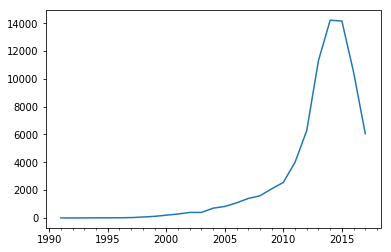

In [6]:
shelter_outcomes['date_of_birth'].value_counts().resample('Y').sum().plot.line()

Se puede comprobar que el gráfico resulta más sencillo de interpretar: la mayoría de los animales adoptados nacieron entre los años 2014 y 2015.  
Pandas también adapta las etiquetas de eje X, para indicar que los datos son los acumulados de un año.

Un ejemplo similar se puede realizar cuando los instantes de tiempo aparecen recogidos en el índice.  

Para el conjunto de dato de la bolsa, el ejemplo podría ser:

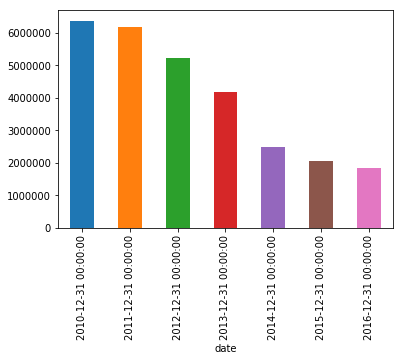

In [7]:
stocks['volume'].resample('Y').mean().plot.bar()

## Gráficos para series temporales

Existen algunas funciones de representación que resultan particulares de las series temporales, o al menos especialmente útiles cuando se emplean con éstas.  
Veremos algunas de ellas ahora:

### Gráfico de Retardo (Lag Plot)

Este tipo de gráficos permite comparar una muestra en un determinado instante de tiempo con la misma variable un cierto periodo de tiempo anterior (normalmente la muestra anterior).

Este tipo de gráficos permite determinar visualmente si la serie de datos sigue una correlación, es decir, datos en un instante se asemejan a los del instante anterior (o si son aleatorios).

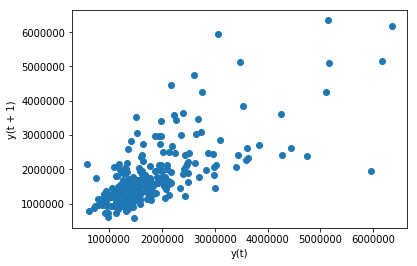

In [8]:
from pandas.plotting import lag_plot

lag_plot(stocks['volume'].tail(250))

Las series temporales suelen exhibir la característica de la **periodicidad**. Esto implica que los picos y los valles de los valores de la serie suelen coincidir con determinados periodos de tiempo.

P. ej: un gimnasio suele tener un pico de asistencia al final de cada día, cuando los clientes salen de sus trabajos (periodicidad diaria); mientras que un bar probablemente vea un pico de clientes los fines de semana (periodicidad semanal).

Este tipo de gráficos de retardo permite comprobar si existe este tipo de correlación claramente en el conjunto. 
** Nótese que sólo podrá comprobarse en el caso de una dependencia "fuerte" con el tiempo (intervalos regulares en el conjunto de datos).

### Gráfico de Autocorrelación (Autocorrelation Plot)

Una gráfica que lleva este concepto de correlación un poco más allá es el gráfico de correlación.  

Permite representar todas las periodicidades a la vez. Se trata de una técnica de resumen multi-variable que computa una característica (llamada correlation score) evaluando esta para todos los lags o retardos disponibles en el conjunto de datos. Este proceso se conoce como autocorrelación.

En el gráfico de autocorrelación, el retardo aparece en el eje de las x, mientras que el índice de autocorrelación aparece en el de las y. Cuanto más alejada está la autocorrelación de 0, mayor será la influencia que las muestras que están a esa distancia ejercen sobre las otras a esa misma distancia.

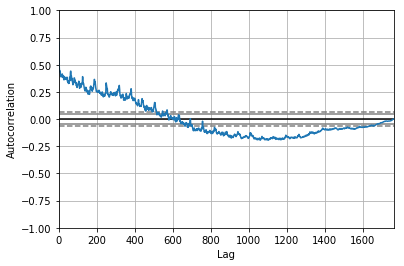

In [9]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(stocks['volume'])

En el caso de los valores bursátiles, se puede comprobar que el volumen de compra-venta aparece descendentemente correlacionado de forma ligera con los valores del año anterior. Está recogido por días, por lo que alrededor de 365 podemos ver la correlación de exactamente un año.

Esto implica un concepto que es más o menos sabido: el volumen de actividad bursatil de un año no tiene ninguna influencia o correlación sobre el volumen del mismo día del año siguiente.